<h1 style="color: Maroon;">Wine Recommendation</h1>

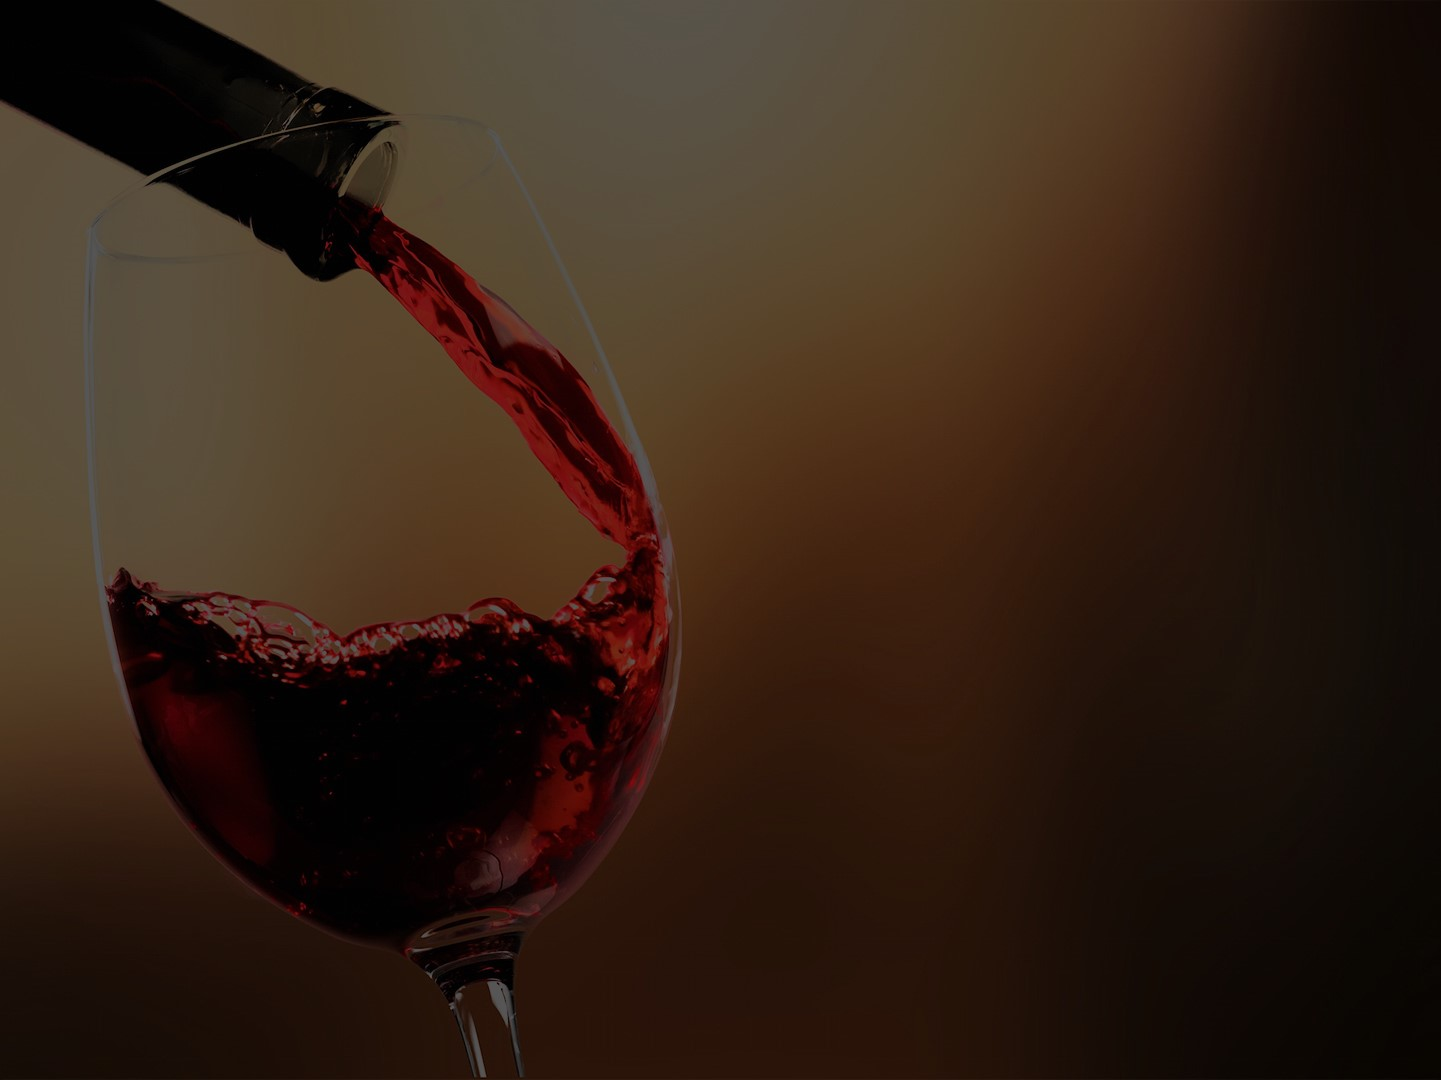

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
from sklearn.cluster import KMeans as km
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN

# Read Dataframe
**Source:** https://github.com/rogerioxavier/X-Wines/tree/main

# X-Wines Dataset
X-Wines is a world wine dataset with 5-stars user ratings for recommender systems, machine learning, and other research purpose.
It is published under free license for wider use.
[Paper](https://www.mdpi.com/2504-2289/7/1/has used the datasetset, where you can also find additional informati
X-Wines is an academic work with scientific relevance in the computing area that is interconnected with other areas of knowledge. https://sites.google.com/farroupilha.ifrs.edu.br/xwinesongs to its users.

### Status:
Consistent. Full publication for [download](https://drive.google.com/drive/folders/1LqguJNV-aKh1PuWMVx5ELA61LPfGfuu_?usp=share_link) in the official repository at Google Drive.

In [3]:
ratings=pd.read_csv('Data/XWines_Test_1K_ratings.csv')
ratings.columns

Index(['RatingID', 'Vintage', 'Rating', 'Date'], dtype='object')

In [4]:
wine=pd.read_csv('Data/XWines_Test_100_wines.csv')
wine.columns

Index(['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'ABV',
       'Body', 'Acidity', 'Code', 'Country', 'RegionID', 'RegionName',
       'WineryID', 'WineryName', 'Website', 'Vintages'],
      dtype='object')

In [5]:
Key_map =pd.read_csv('Data/Key_map.csv')
Key_map.head()

RatingID   UserID  WineID
0      3211  1209683  111478
1     27878  1209980  111478
2     31227  1258705  111478
3     41946  1139706  111478
4     61700  1240747  111478

In [7]:
ratings.isnull().sum()

RatingID    0
Vintage     0
Rating      0
Date        0
dtype: int64

In [8]:
wine.isnull().sum()

WineID         0
WineName       0
Type           0
Elaborate     22
Grapes         0
Harmonize     25
ABV            0
Body          19
Acidity        0
Code          20
Country        0
RegionID       0
RegionName     0
WineryID       0
WineryName    24
Website        0
Vintages       0
dtype: int64

In [18]:
Key_map.isnull().sum()

RatingID    12
UserID       6
WineID       8
dtype: int64

In [17]:
'''# Introduce random nulls
def introduce_null(df, columns_to_null, null_probability):
    for column in columns_to_null:
        df[column] = df[column].apply(lambda x: np.nan if np.random.rand() < null_probability else x)
    return df

#Key_map
Key_map= introduce_null(Key_map, ['RatingID', 'UserID', 'WineID'], 0.01)

# Wine
wine= introduce_null(wine, ['Elaborate', 'Harmonize',
       'Body',  'Code','WineryName'], 0.21)'''

"# Wine\nwine= introduce_null(wine, ['Elaborate', 'Harmonize',\n       'Body',  'Code','WineryName'], 0.21)"

In [9]:
# Saving the induced files
'''wine.to_csv('Data/XWines_Test_100_wines.csv')
Key_map.to_csv('Data/Key_map.csv')'''

"wine.to_csv('Data/XWines_Test_100_wines.csv')\nKey_map.to_csv('Data/Key_map.csv')"

# IDA

In [6]:
wine.describe()

WineID         ABV     RegionID     WineryID
count     100.000000  100.000000   100.000000    100.00000
mean   145204.330000   13.659000  1662.880000  39436.31000
std     30804.190102    4.258375   508.142314  18818.76652
min    100062.000000    4.000000  1001.000000  10000.00000
25%    116106.250000   12.875000  1295.750000  22161.50000
50%    142696.000000   13.350000  1618.000000  42426.50000
75%    173566.750000   14.300000  1942.250000  55436.75000
max    198580.000000   48.000000  3707.000000  70437.00000

In [7]:
ratings.describe()

RatingID       Rating
count  1.000000e+03  1000.000000
mean   9.190599e+06     3.772000
std    6.345618e+06     0.706056
min    3.211000e+03     1.000000
25%    3.596661e+06     3.500000
50%    8.387677e+06     4.000000
75%    1.437478e+07     4.000000
max    2.088965e+07     5.000000

In [8]:
Key_map.describe()

RatingID        UserID         WineID
count  1.000000e+03  1.000000e+03    1000.000000
mean   9.190599e+06  1.273501e+06  144852.047000
std    6.345618e+06  2.604115e+05   31381.997314
min    3.211000e+03  1.000045e+06  100062.000000
25%    3.596661e+06  1.099584e+06  113730.000000
50%    8.387677e+06  1.197476e+06  143222.000000
75%    1.437478e+07  1.356095e+06  174274.000000
max    2.088965e+07  2.062232e+06  198580.000000

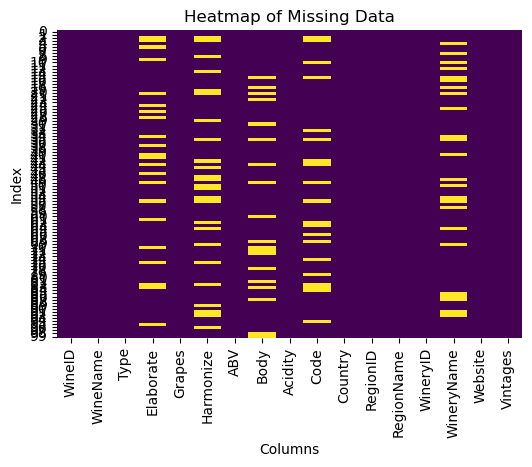

In [9]:
# Plot the heatmap of missing data
plt.figure(figsize=(6, 4))
sns.heatmap(wine.isnull(), cmap='viridis', cbar=False, yticklabels=True)
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()
#plt.savefig('wine_100.png', dpi=300, bbox_inches='tight')


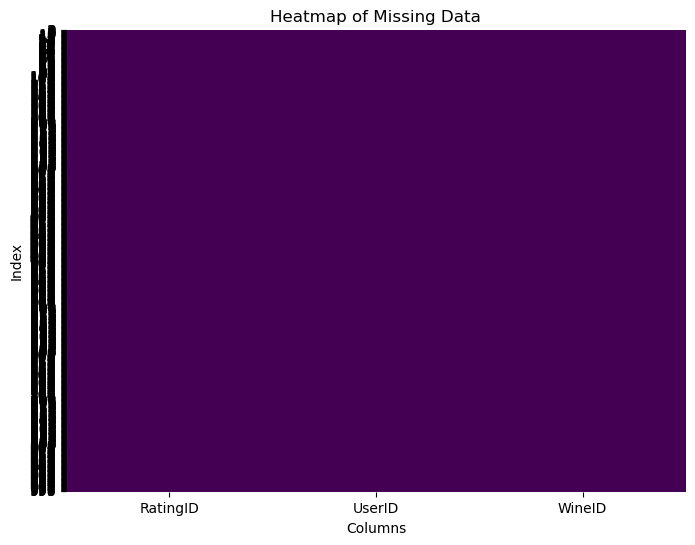

In [10]:
# Plot the heatmap of missing data
plt.figure(figsize=(8, 6))
sns.heatmap(Key_map.isnull(), cmap='viridis', cbar=False, yticklabels=True)
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Index')
#plt.savefig('Key_map.png', dpi=300, bbox_inches='tight')
plt.show()

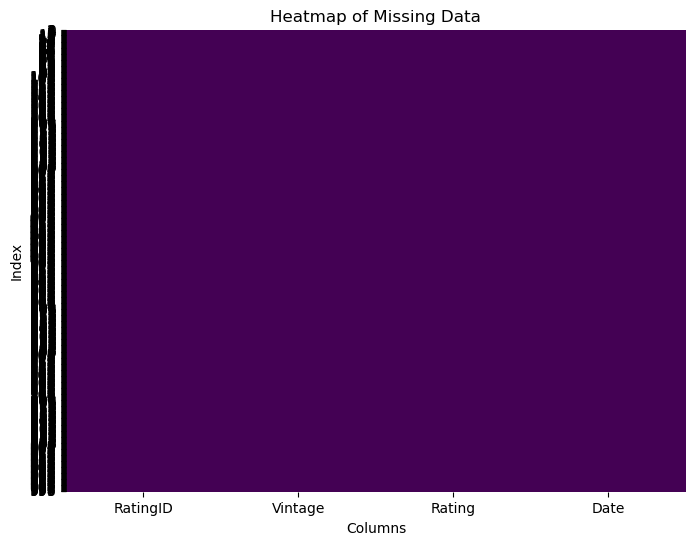

In [11]:
# Plot the heatmap of missing data
plt.figure(figsize=(8, 6))
sns.heatmap(ratings.isnull(), cmap='viridis', cbar=False, yticklabels=True)
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Index')
#plt.savefig('XWines_Test_1K_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

### Imputatiuon

In [12]:
# Droping the null columns since very few values are missing
Key_map.dropna(inplace=True)

In [13]:
# Apply label encoder on wine dataset
label_encoders = {}
categorical_cols = ['WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'Body', 'Acidity', 'Code', 'Country',  'RegionName','WineryName', 'Website', 'Vintages' ]
for col in categorical_cols:
    le = LabelEncoder()
    wine[col] = le.fit_transform(wine[col].astype(str))
    label_encoders[col] = le

In [14]:
# Apply knn on the missing columns of wine dataset
columns_for_imputation = ['Elaborate', 'Harmonize','Body',  'Code','WineryName']
# Applying KNN Imputation for missing values
imputer = KNNImputer(n_neighbors=5)
wine[columns_for_imputation] = imputer.fit_transform(wine[columns_for_imputation])
wine[columns_for_imputation] = wine[columns_for_imputation].round().astype(int)

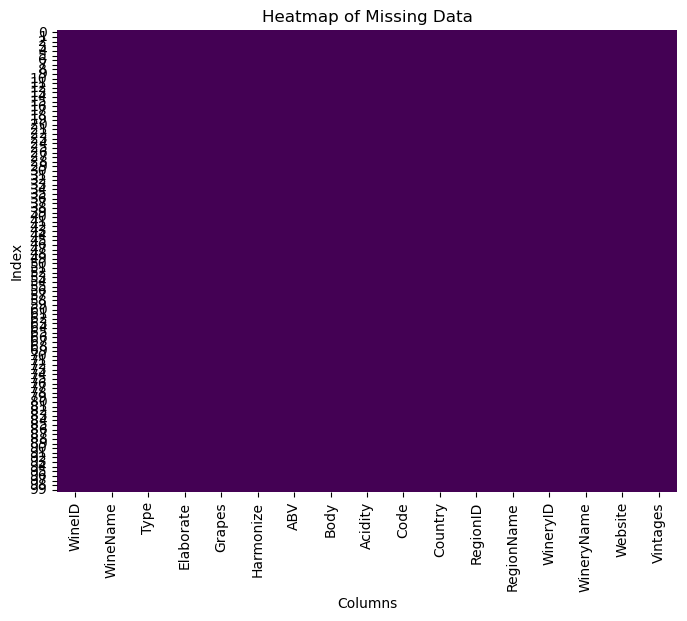

In [15]:
# Plot the heatmap of missing data after imputation
plt.figure(figsize=(8, 6))
sns.heatmap(wine.isnull(), cmap='viridis', cbar=False, yticklabels=True)
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Index')
#plt.savefig('wine_100_imputed.png', dpi=300, bbox_inches='tight')
plt.show()

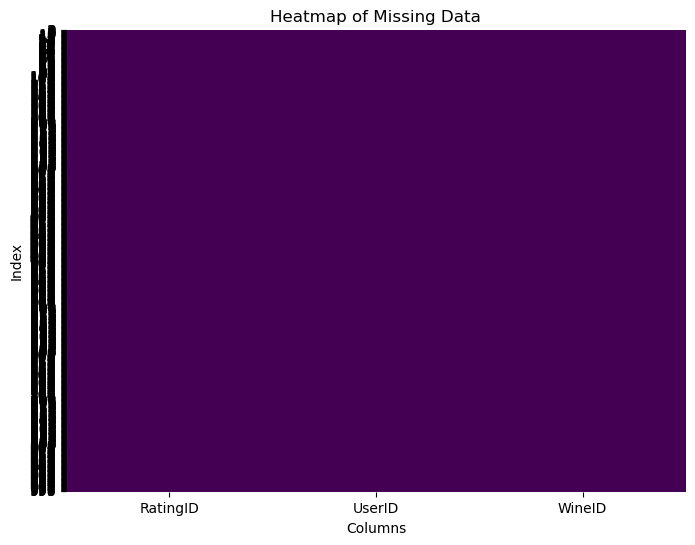

In [16]:
# Plot the heatmap of missing data after imputation key map
plt.figure(figsize=(8, 6))
sns.heatmap(Key_map.isnull(), cmap='viridis', cbar=False, yticklabels=True)
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Index')
#plt.savefig('Key_map_imputed.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Decode the encoded columns
for col in categorical_cols:
    le = label_encoders[col]  # Get the saved LabelEncoder for this column
    #wine[col] = wine[col].astype(int)
    wine[col] = le.inverse_transform(wine[col])  # Decode directly without type conversion
wine.head()


WineID                          WineName          Type         Elaborate  \
0  100062                     Origem Merlot           Red     Varietal/100%   
1  100191                Reserva Chardonnay         White     Varietal/100%   
2  101847  Dona Antonia Porto Reserva Tawny  Dessert/Port               nan   
3  102055                    Fine Ruby Port  Dessert/Port               nan   
4  102079                         Maré Alta         White  Assemblage/Blend   

                                              Grapes  \
0                                         ['Merlot']   
1                                     ['Chardonnay']   
2  ['Touriga Nacional', 'Touriga Franca', 'Tinta ...   
3  ['Tinta Amarela', 'Tinta Barroca', 'Touriga Fr...   
4                ['Loureiro', 'Alvarinho', 'Arinto']   

                                           Harmonize   ABV               Body  \
0  ['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...  13.0        Full-bodied   
1  ['Rich Fish', 'Seafood', 'Risotto', 'Poultry',...  13.0      Medium-bodied   
2                                                nan  20.0   Very full-bodied   
3                                                nan  19.5   Very full-bodied   
4  ['Fish', 'Shellfish', 'Vegetarian', 'Appetizer...  10.0  Very light-bodied   

  Acidity Code   Country  RegionID         RegionName  WineryID  \
0  Medium   BR    Brazil      1002  Vale dos Vinhedos     10014   
1  Medium   BR    Brazil      1001       Serra Gaúcha     10000   
2    High  nan  Portugal      1031              Porto     10674   
3  Medium  nan  Portugal      1031              Porto     10703   
4    High   PT  Portugal      1034        Vinho Verde     11486   

       WineryName                                      Website  \
0    Casa Valduga                http://www.casavalduga.com.br   
1          Aurora             http://www.vinicolaaurora.com.br   
2  Porto Ferreira  https://sogrape.com/pt/brand/porto-ferreira   
3        Sandeman                      http://www.sandeman.com   
4             nan            https://www.casadafontepequena.pt   

                                            Vintages  
0  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  
1  [2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...  
2  [2021, 2020, 2019, 2018, 2017, 2016, 2015, 201...  
3  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  
4  [2022, 2021, 2020, 2019, 2018, 2017, 2016, 201...

# Merging the Tables

In [18]:
df= pd.merge(wine, Key_map, on='WineID')
df= pd.merge(df, ratings, on='RatingID')
df.head()

WineID       WineName Type      Elaborate      Grapes  \
0  100062  Origem Merlot  Red  Varietal/100%  ['Merlot']   
1  100062  Origem Merlot  Red  Varietal/100%  ['Merlot']   
2  100062  Origem Merlot  Red  Varietal/100%  ['Merlot']   
3  100062  Origem Merlot  Red  Varietal/100%  ['Merlot']   
4  100062  Origem Merlot  Red  Varietal/100%  ['Merlot']   

                                           Harmonize   ABV         Body  \
0  ['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...  13.0  Full-bodied   
1  ['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...  13.0  Full-bodied   
2  ['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...  13.0  Full-bodied   
3  ['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...  13.0  Full-bodied   
4  ['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...  13.0  Full-bodied   

  Acidity Code  ...         RegionName  WineryID    WineryName  \
0  Medium   BR  ...  Vale dos Vinhedos     10014  Casa Valduga   
1  Medium   BR  ...  Vale dos Vinhedos     10014  Casa Valduga   
2  Medium   BR  ...  Vale dos Vinhedos     10014  Casa Valduga   
3  Medium   BR  ...  Vale dos Vinhedos     10014  Casa Valduga   
4  Medium   BR  ...  Vale dos Vinhedos     10014  Casa Valduga   

                         Website  \
0  http://www.casavalduga.com.br   
1  http://www.casavalduga.com.br   
2  http://www.casavalduga.com.br   
3  http://www.casavalduga.com.br   
4  http://www.casavalduga.com.br   

                                            Vintages  RatingID   UserID  \
0  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...   2644207  2037611   
1  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...   9655227  1007559   
2  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  12205871  1261887   
3  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  13944896  1117421   
4  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  13980397  1048267   

   Vintage  Rating             Date  
0     2010     5.0    7/2/2018 2:32  
1     2015     3.5   10/8/2017 1:51  
2     2016     3.0  9/15/2017 14:05  
3     2016     5.0  10/2/2018 20:54  
4     2016     3.5   5/1/2020 10:19  

[5 rows x 22 columns]

In [19]:
df.nunique()

WineID         100
WineName        97
Type             6
Elaborate       10
Grapes          65
Harmonize       58
ABV             31
Body             6
Acidity          3
Code            16
Country         17
RegionID        77
RegionName      77
WineryID       100
WineryName      77
Website        100
Vintages       100
RatingID      1000
UserID         636
Vintage         37
Rating           9
Date          1000
dtype: int64

In [20]:
df.dtypes

WineID          int64
WineName       object
Type           object
Elaborate      object
Grapes         object
Harmonize      object
ABV           float64
Body           object
Acidity        object
Code           object
Country        object
RegionID        int64
RegionName     object
WineryID        int64
WineryName     object
Website        object
Vintages       object
RatingID        int64
UserID          int64
Vintage        object
Rating        float64
Date           object
dtype: object

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
df.to_csv('Data/merged_datset.csv')

# EDA

In [22]:
df.columns

Index(['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'ABV',
       'Body', 'Acidity', 'Code', 'Country', 'RegionID', 'RegionName',
       'WineryID', 'WineryName', 'Website', 'Vintages', 'RatingID', 'UserID',
       'Vintage', 'Rating', 'Date'],
      dtype='object')

In [25]:
# Mutual Information (Note: Didnt upload the interactive plot directly to streamlit to reduce the computation time in streamlit and ensure smooth performance)
df_copy= df.copy()

# Apply label encoder on merged dataset copy
label_encoders = {}
categorical_cols = ['WineName', 'Type', 'Elaborate', 'Body', 'Acidity', 'Code', 'Country',  'RegionName','WineryName',  'Vintage' ]
for col in categorical_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))
    label_encoders[col] = le
mutual_info = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calculate mutual information for each pair of categorical columns
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            mi = mutual_info_classif(df_copy[[col1]], df_copy[col2], discrete_features=True)
            mutual_info.loc[col1, col2] = mi[0]

# Fill diagonal values with 0 (since mutual info with itself is irrelevant)
mutual_info.fillna(0, inplace=True)

# Convert the mutual information DataFrame to long format for Altair visualization
mutual_info_long = mutual_info.reset_index().melt(id_vars='index')
mutual_info_long.columns = ['Column1', 'Column2', 'Mutual_Information']

# Create an interactive heatmap with Altair
base = alt.Chart(mutual_info_long).encode(
    x='Column1:O',
    y='Column2:O'
)

# Heatmap layer
heatmap = base.mark_rect().encode(
    color=alt.Color('Mutual_Information:Q', scale=alt.Scale(scheme='reds')),
    tooltip=['Column1', 'Column2', 'Mutual_Information']
)

# Text layer for displaying values
text = base.mark_text().encode(
    text=alt.Text('Mutual_Information:Q', format='.2f'),
    color=alt.condition(
        alt.datum.Mutual_Information > 0.5,  # Adjust threshold for text color
        alt.value('black'),
        alt.value('grey')
    )
)

# Combine heatmap and text layers
final_chart = (heatmap + text).properties(
    width=400,
    height=400,
    title='Mutual Information Between Categorical Columns'
).interactive()

# Display the heatmap
final_chart

alt.LayerChart(...)

In [26]:
# Scatter plot for points vs. price
scatter = alt.Chart(df).mark_circle(size=100).encode(
    x=alt.X('ABV:Q', scale=alt.Scale(domain=[80, 100]), title='Alcohol Content (ABV)'),
    y=alt.Y('Rating:Q', scale=alt.Scale(domain=[3.5, 5]), title='Wine Rating'),
    color=alt.Color('Country:N', title='Country', legend=alt.Legend(orient="right")),
    tooltip=['ABV', 'Rating', 'Country']
).properties(
    width=100,
    height=100
)

# Density plot for x-axis (ABV)
x_density = alt.Chart(df).transform_density(
    'ABV',
    as_=['Alcohol Content', 'Density'],
    bandwidth=1
).mark_area(
    opacity=0.6,
    color='#6baed6'
).encode(
    x=alt.X('Alcohol Content:Q', title=None),
    y=alt.Y('Density:Q', title=None),
).properties(
    width=400,
    height=100
)

# Density plot for y-axis (Rating)
y_density = alt.Chart(df).transform_density(
    'Rating',
    as_=['Wine Rating', 'Density'],
    bandwidth=0.1
).mark_area(
    opacity=0.6,
    color='#fc9272'
).encode(
    x=alt.X('Density:Q', title=None),
    y=alt.Y('Wine Rating:Q', title=None),
).properties(
    width=100,
    height=400
)

# Combine the plots
joint_plot = alt.hconcat(
    y_density,
    alt.vconcat(x_density, scatter)
).resolve_scale(
    x='independent',
    y='independent'
).configure_view(
    stroke=None
).configure_title(
    fontSize=16,
    anchor='start',
    font='Arial'
)

# Add title to the combined chart
joint_plot = joint_plot.properties(
    title='Joint Plot: Alcohol Content vs. Rating (Colored by Country)'
)

# Display the improved joint plot
joint_plot.display()

alt.HConcatChart(...)

In [27]:
df= df.drop_duplicates()
df.shape

(1000, 22)

##### Distribution

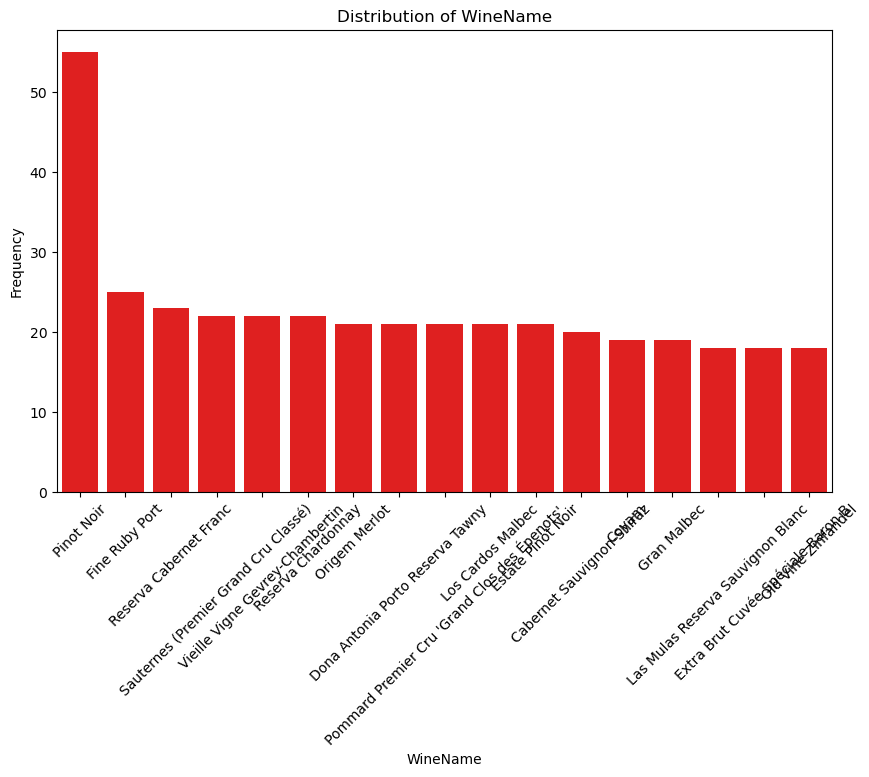

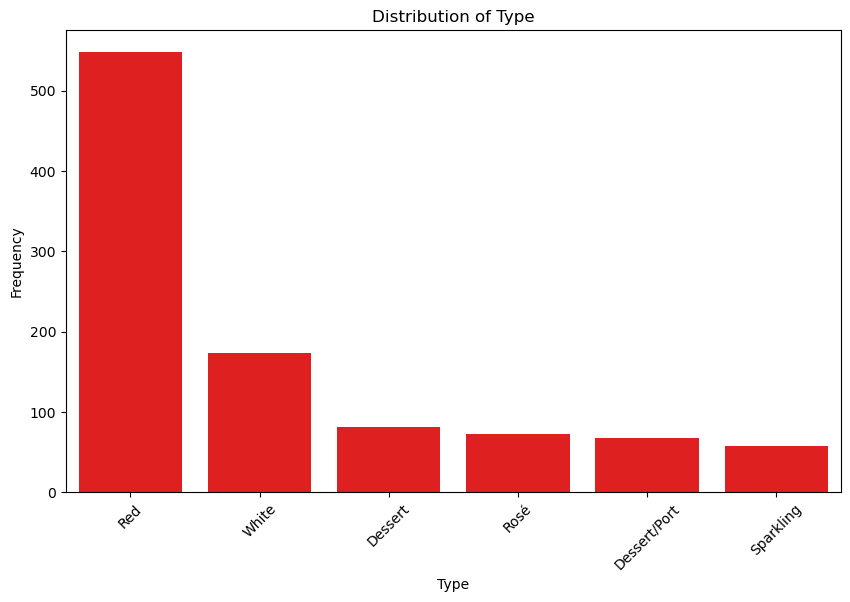

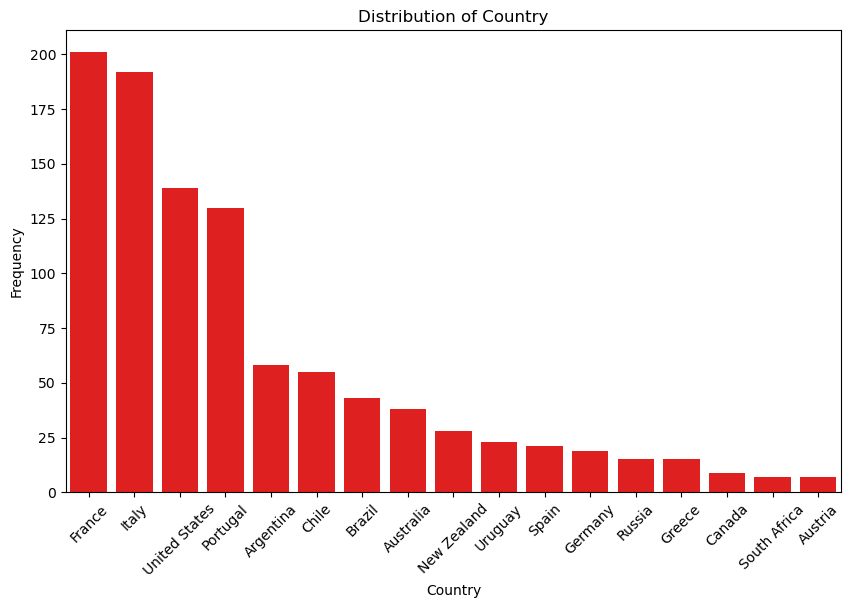

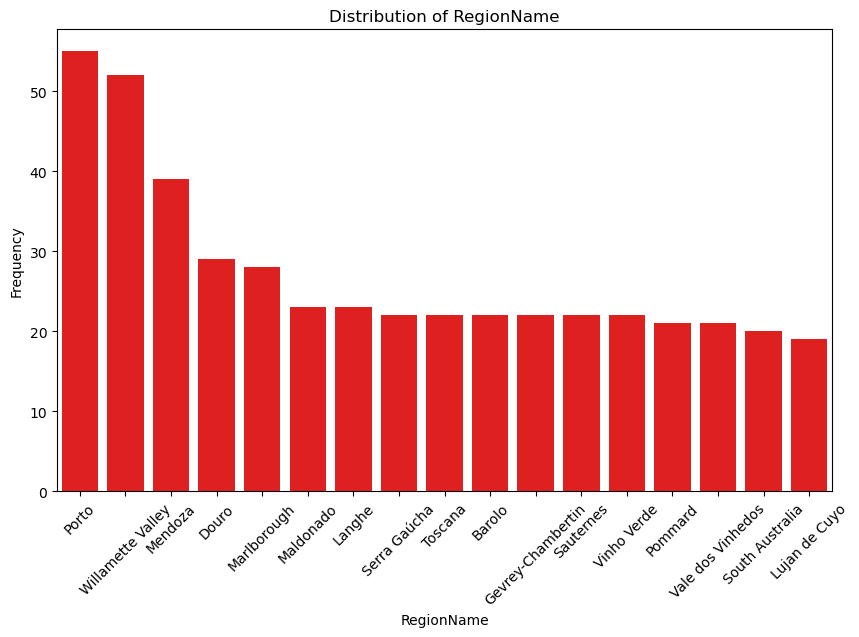

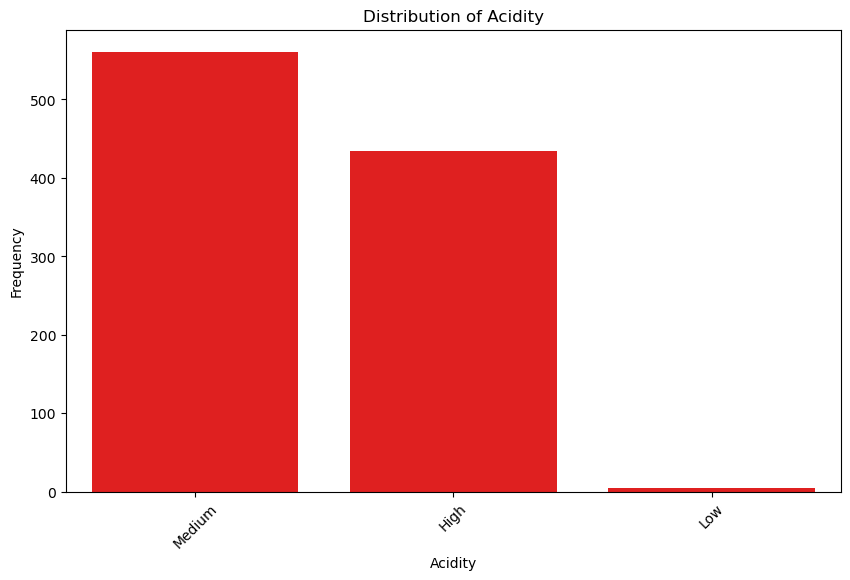

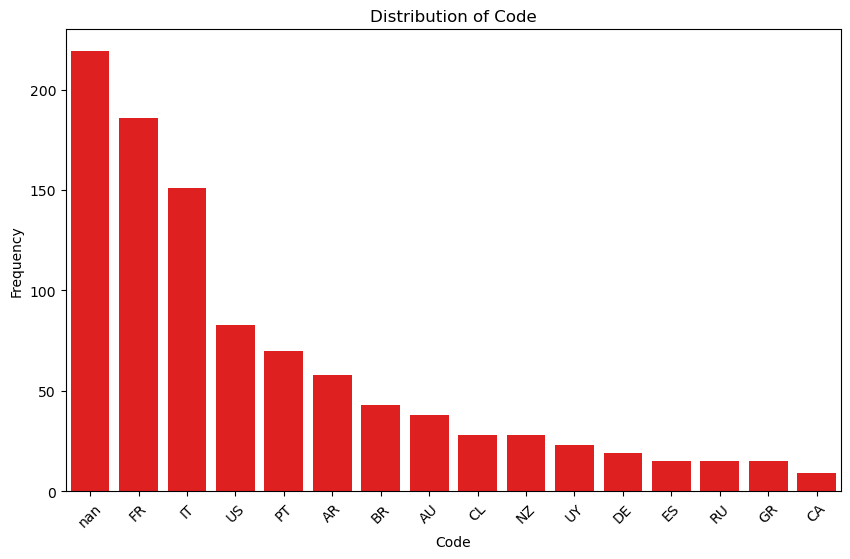

In [28]:
# Distribution of Variables
# Function to preprocess the data and keep only the top N categories
def preprocess_top_categories(data, column, top_n=17):
    # Get the top N categories
    top_categories = data[column].value_counts().nlargest(top_n).index
    # Filter the data to include only the top N categories
    data[column] = data[column].apply(lambda x: x if x in top_categories else None)
    return data

# Function to plot bar plots
def plot_bar(data, column, title, xlabel, ylabel, df_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index, color= 'red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.savefig(f'{column}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Categorical Feature Distribution
categorical_columns = ['WineName','Type', 'Country', 'RegionName', 'Acidity', 'Code']

# Loop through each column and preprocess if necessary
for column in categorical_columns:
    if column in df.columns:
        if df[column].nunique() > 17:  # Check if the column has more than 17 unique values
            df = preprocess_top_categories(df, column, top_n=17)
        plot_bar(df, column, f'Distribution of {column}', column, 'Frequency', column)


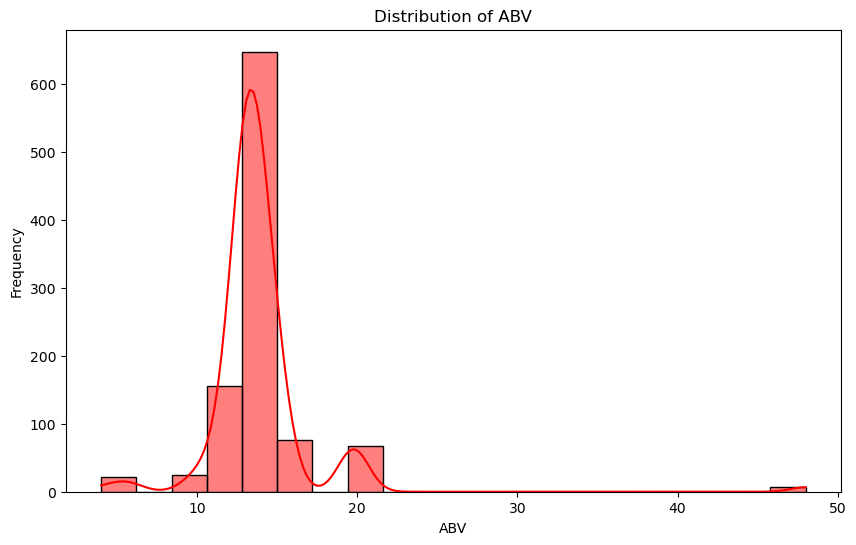

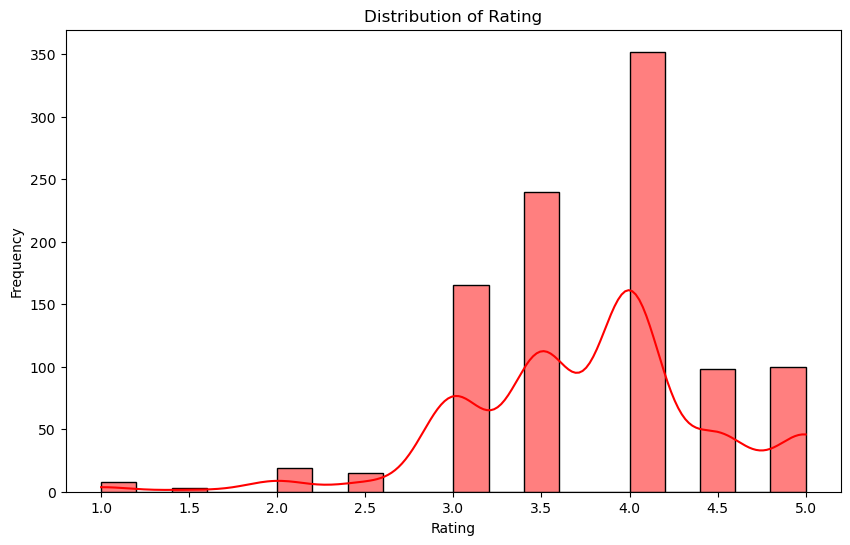

In [29]:
# histograms
def plot_hist(df, column, title, xlabel, bins=20):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True, bins=bins, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.savefig(f'{xlabel}.png', dpi=300, bbox_inches='tight')
    plt.show()
# Numerical Feature Distribution
numerical_columns = ['ABV', 'Rating']
for column in numerical_columns:
    if column in df.columns:
        plot_hist(df, column, f'Distribution of {column}', column)

##### Rating based on various category

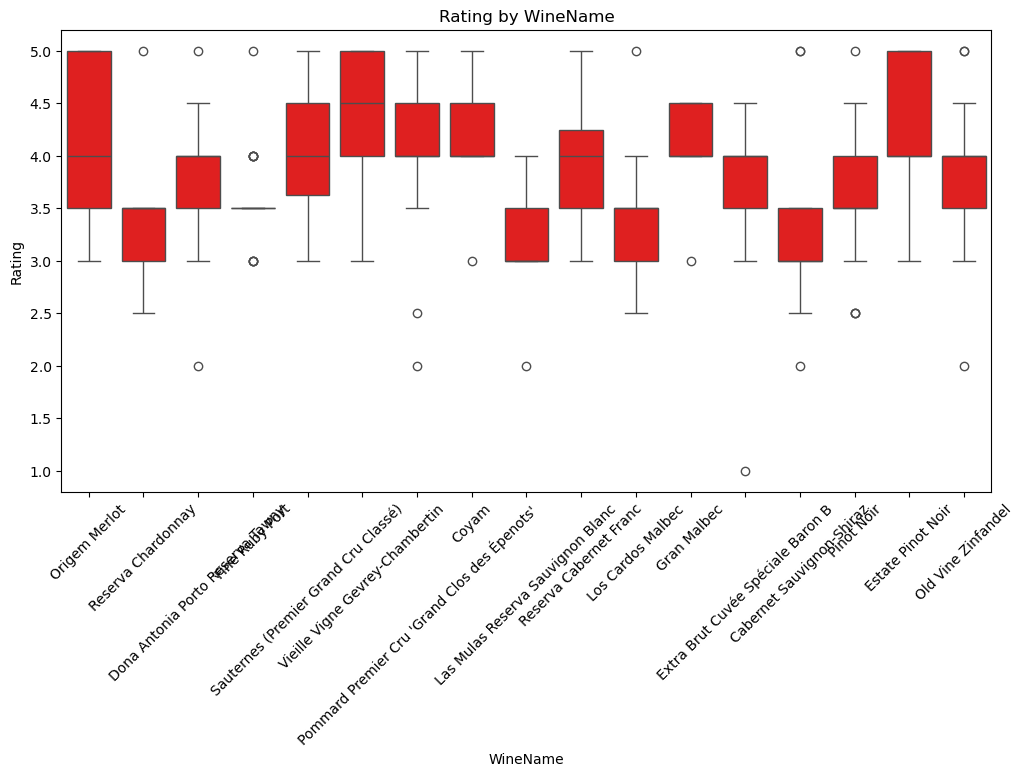

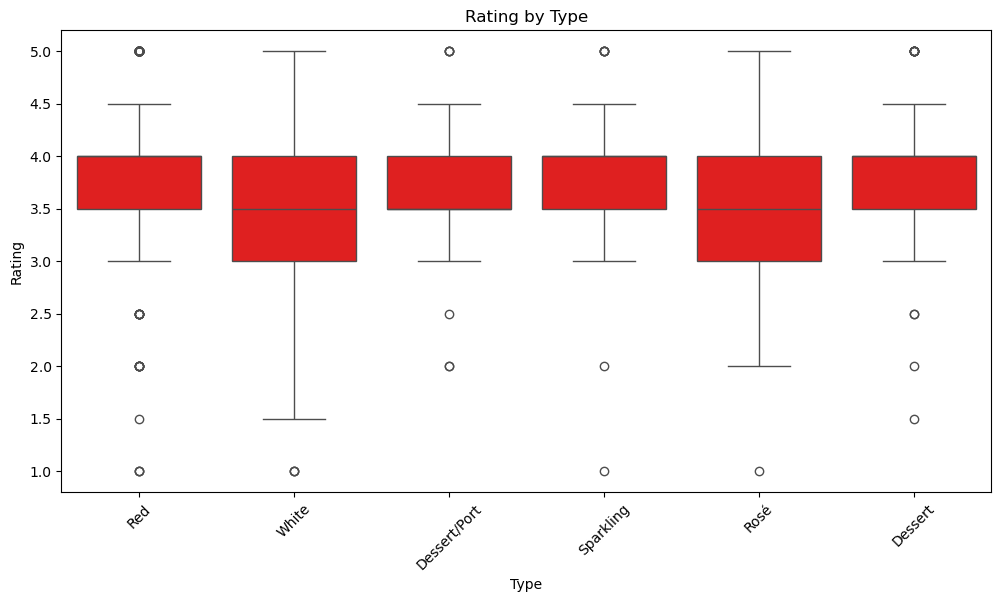

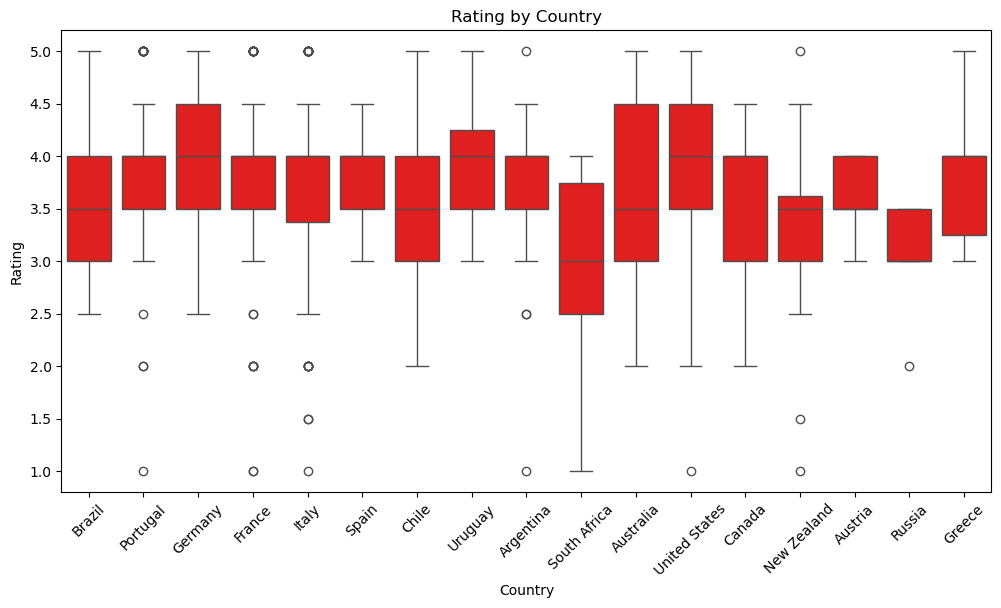

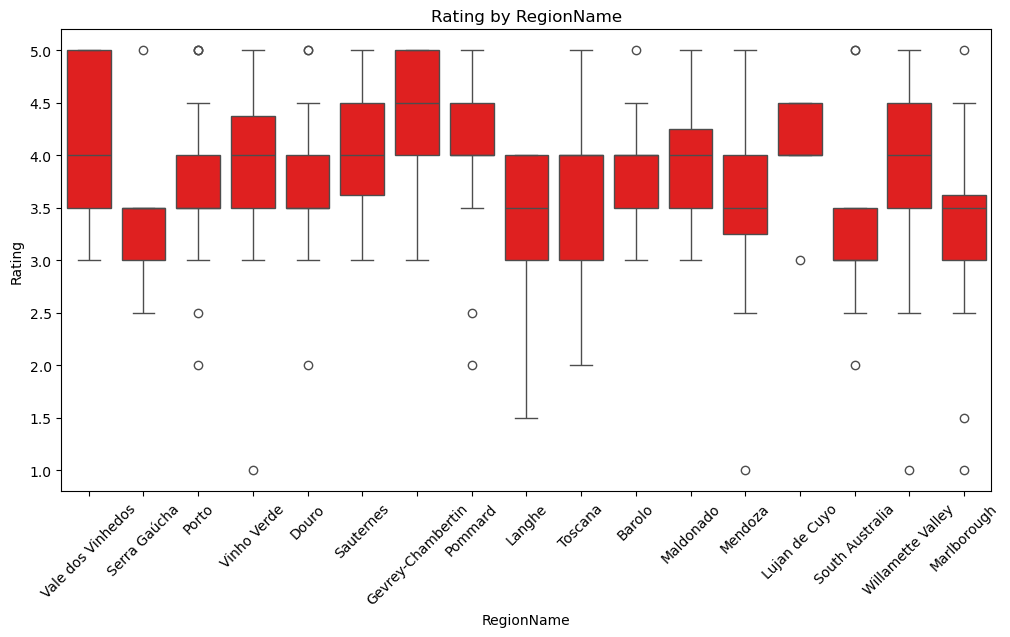

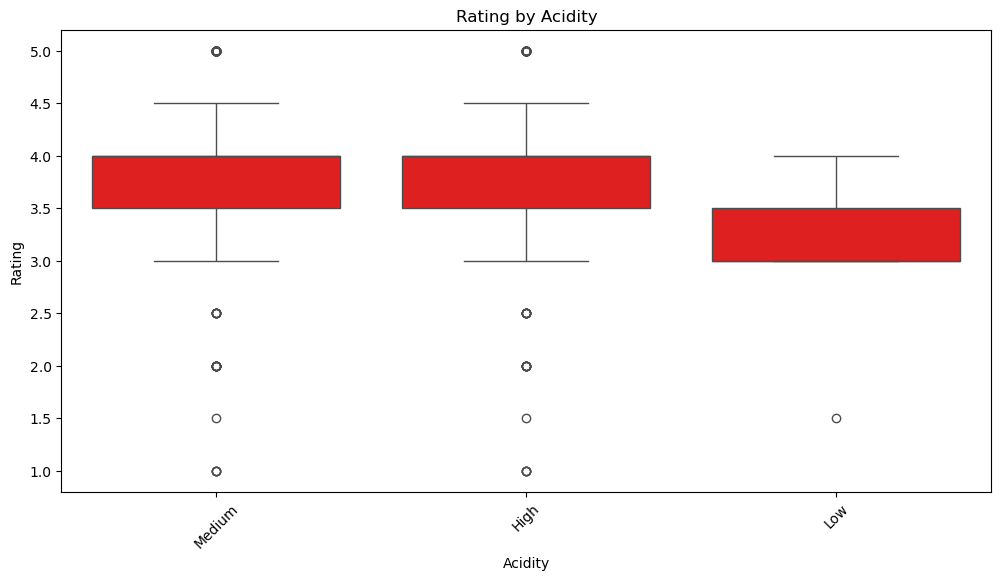

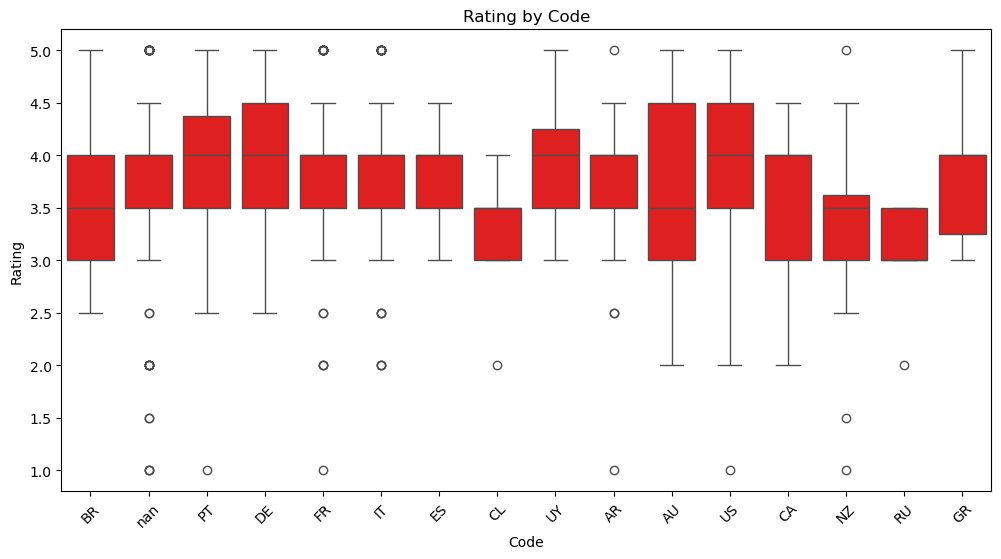

In [30]:
# Rating based on various category
# boxplots
def plot_box(df, x, y, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=x, y=y, color='red')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.savefig(f'{x}.png', dpi=300, bbox_inches='tight')
    plt.show()
        

# Categorical Feature Distribution
categorical_columns = ['WineName','Type', 'Country', 'RegionName', 'Acidity', 'Code']

# Loop through each column and preprocess if necessary
for column in categorical_columns:
    if column in df.columns:
        if df[column].nunique() > 17:  # Check if the column has more than 17 unique values
            df = preprocess_top_categories(df, column, top_n=17)
        plot_box(df, column, 'Rating', f'Rating by {column}')

In [31]:
df_exp = df.groupby(
    ['WineName', 'Type', 'Elaborate', 'Body', 'Acidity', 'Code', 'Country', 'RegionName', 'WineryName']
).agg({
    'ABV': 'mean',
    'Rating': 'mean',
    'Grapes': 'first',  # Combine values in the column into a list
    'Harmonize': 'first'  # Combine values in the column into a list
}).reset_index()
#df_exp.to_csv("EDA.csv")
df_exp.head()

WineName          Type         Elaborate  \
0          Cabernet Sauvignon-Shiraz           Red               nan   
1   Dona Antonia Porto Reserva Tawny  Dessert/Port               nan   
2                  Estate Pinot Noir           Red     Varietal/100%   
3  Extra Brut Cuvée Spéciale Baron B     Sparkling  Assemblage/Blend   
4                     Fine Ruby Port  Dessert/Port               nan   

               Body Acidity Code        Country         RegionName  \
0  Very full-bodied  Medium   AU      Australia    South Australia   
1  Very full-bodied    High  nan       Portugal              Porto   
2     Medium-bodied  Medium   US  United States  Willamette Valley   
3     Medium-bodied  Medium   AR      Argentina            Mendoza   
4  Very full-bodied  Medium  nan       Portugal              Porto   

          WineryName   ABV    Rating  \
0     Oxford Landing  13.5  3.275000   
1     Porto Ferreira  20.0  3.809524   
2             Illahe  13.5  4.261905   
3  CHANDON Argentina  12.5  3.611111   
4           Sandeman  19.5  3.580000   

                                              Grapes  \
0             ['Cabernet Sauvignon', 'Syrah/Shiraz']   
1  ['Touriga Nacional', 'Touriga Franca', 'Tinta ...   
2                                     ['Pinot Noir']   
3                       ['Chardonnay', 'Pinot Noir']   
4  ['Tinta Amarela', 'Tinta Barroca', 'Touriga Fr...   

                                   Harmonize  
0                                        nan  
1                                        nan  
2   ['Beef', 'Veal', 'Game Meat', 'Poultry']  
3  ['Pork', 'Fish', 'Poultry', 'Vegetarian']  
4                                        nan

##### World Map

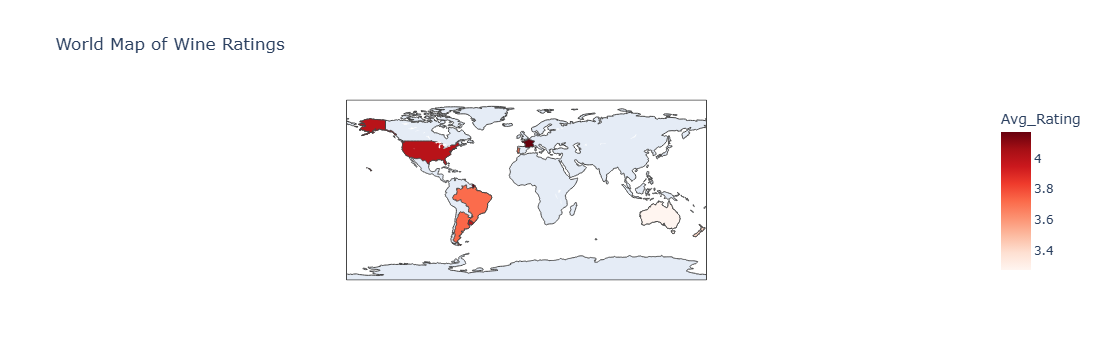

In [33]:
# Required columns
required_columns = ['Country', 'WineName', 'Rating']

# Aggregate data: Calculate the average rating and compile a list of wines for each country
country_data = df_exp.groupby('Country').agg(
    Avg_Rating=('Rating', 'mean'),  
    Wine_List=('WineName', lambda x: ', '.join(x.unique()))
).reset_index()

# Create a choropleth map
fig = px.choropleth(
    country_data,
    locations='Country',
    locationmode='country names',  
    color='Avg_Rating',
    hover_name='Country',
    hover_data={'Avg_Rating': True, 'Wine_List': True},  # Correct column names
    title='World Map of Wine Ratings',
    color_continuous_scale='reds'
)

# Show the interactive map
fig.show()


# Feature Engineering

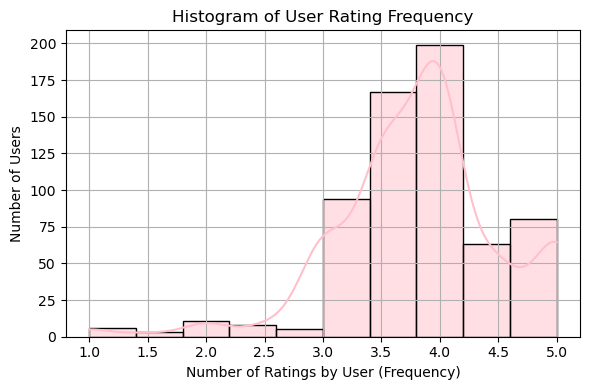

In [114]:
# Group by UserID and calculate mean, std, and count
user_stats = df.groupby('UserID')['Rating'].agg(['mean', 'std', 'count']).reset_index()

# Plot a histogram of user frequency
plt.figure(figsize=(6, 4))
sns.histplot(data=user_stats, x='mean', bins=10, kde=True, color='pink', edgecolor='black')
plt.title("Histogram of User Rating Frequency")
plt.xlabel("Number of Ratings by User (Frequency)")
plt.ylabel("Number of Users")
plt.grid(True)
plt.tight_layout()
#plt.savefig('User_Rating.png', dpi=300, bbox_inches='tight')
plt.show()

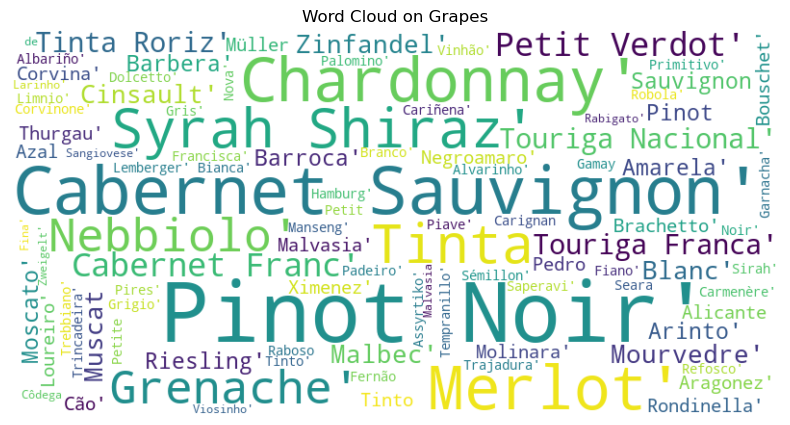

In [133]:
# Flatten the list of words
all_words = [grape for grape in df_exp['Grapes'] ]

# Concatenate all words into a single string
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="White").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud on Grapes')
#plt.savefig('Word_Cloud_Grapes.png', dpi=300, bbox_inches='tight')
plt.show()

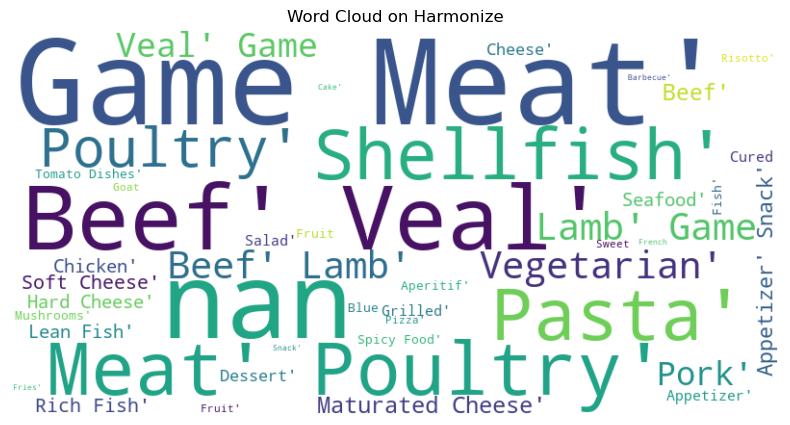

In [134]:
# Flatten the list of words
all_words = [food for food in df_exp['Harmonize'] ]

# Concatenate all words into a single string
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="White").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud on Harmonize')
#plt.savefig('Word_Cloud_Harmonize.png', dpi=300, bbox_inches='tight')
plt.show()

In [137]:
# Explode the 'Values' column
df_exploded = df_exp.explode('Grapes').reset_index(drop=True)

print("\nDataFrame after exploding:")
df_exploded.head()


DataFrame after exploding:


WineName   Type         Elaborate           Body  \
0  Al Poggio Chardonnay di Toscana  White     Varietal/100%  Medium-bodied   
1               Além do Rio Branco  White  Assemblage/Blend  Medium-bodied   
2  Bandol Cuvée Spéciale La Louffe    Red  Assemblage/Blend    Full-bodied   
3                   Barbera d'Alba    Red     Varietal/100%  Medium-bodied   
4               Bardolino Classico    Red               nan    Full-bodied   

  Acidity Code   Country          RegionName       WineryName   ABV    Rating  \
0    High  nan     Italy             Toscana  Castello di Ama  13.0  3.566667   
1    High   PT  Portugal              Lisboa              nan   9.5  4.071429   
2  Medium   FR    France              Bandol  Domaine Tempier  14.0  4.000000   
3  Medium   IT     Italy      Barbera d'Alba  Filippo Gallino  15.0  3.812500   
4  Medium  nan     Italy  Bardolino Classico              nan  12.5  2.714286   

                                              Grapes  \
0                                     ['Chardonnay']   
1  ['Malvasia', 'Seara Nova', 'Arinto', 'Fernão P...   
2              ['Mourvedre', 'Grenache', 'Cinsault']   
3                                        ['Barbera']   
4              ['Corvina', 'Rondinella', 'Molinara']   

                                           Harmonize  
0                                                nan  
1     ['Pasta', 'Grilled', 'Shellfish', 'Lean Fish']  
2  ['Beef', 'Veal', 'Lamb', 'Maturated Cheese', '...  
3  ['Pasta', 'Veal', 'Pork', 'Game Meat', 'Poultry']  
4                                                nan

In [140]:
# Calculate mean and standard deviation of ratings for each user
UserID_stats = df.groupby('UserID')['Rating'].agg(['mean', 'std', 'count']).reset_index()
UserID_stats.rename(columns={'mean': 'User_Rating_Mean', 'std': 'User_Rating_Std', 'count': 'User_Rating_count'}, inplace=True)
UserID_stats.fillna(0, inplace=True)  # Handle NaN values by replacing them with 0

# Calculate mean and standard deviation of ratings for each wine
WineID_stats = df.groupby('WineID')['Rating'].agg(['mean', 'std', 'count']).reset_index()
WineID_stats.rename(columns={'mean': 'Wine_Rating_Mean', 'std': 'Wine_Rating_Std', 'count': 'Wine_Rating_count'}, inplace=True)
WineID_stats.fillna(0, inplace=True)  # Handle NaN values by replacing them with 0

# Merge user stats with the original dataframe
df = pd.merge(df, UserID_stats, on='UserID', how='left')

# Merge wine stats with the original dataframe
df = pd.merge(df, WineID_stats, on='WineID', how='left')

# Calculate normalized user rating
df['Normalised_User_Rating'] = (df['Rating'] - df['User_Rating_Mean']) / df['User_Rating_Std']

# Calculate normalized wine rating
df['Normalised_Wine_Rating'] = (df['Rating'] - df['Wine_Rating_Mean']) / df['Wine_Rating_Std']

# Handle division by zero or NaN in normalization by replacing resulting NaNs or infinities with 0
df['Normalised_User_Rating'].fillna(0, inplace=True)
df['Normalised_Wine_Rating'].fillna(0, inplace=True)


In [145]:
# Ensure 'Grapes' and 'Harmonize' columns are lists of strings (handle missing values)
df['Grapes'] = df['Grapes'].fillna("").apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['Harmonize'] = df['Harmonize'].fillna("").apply(lambda x: x.split(',') if isinstance(x, str) else [])

# One-hot encoding for common terms in Grapes and Harmonize
mlb = MultiLabelBinarizer()

# Grapes encoding
grape_features = mlb.fit_transform(df['Grapes'])
grape_df = pd.DataFrame(grape_features, columns=[f'Grape_{label}' for label in mlb.classes_])
df = pd.concat([df.reset_index(drop=True), grape_df.reset_index(drop=True)], axis=1)

# Harmonize encoding
harmonize_features = mlb.fit_transform(df['Harmonize'])
harmonize_df = pd.DataFrame(harmonize_features, columns=[f'Harmonize_{label}' for label in mlb.classes_])
df = pd.concat([df.reset_index(drop=True), harmonize_df.reset_index(drop=True)], axis=1)

# Diversity and Count features
df['Grape_Count'] = df['Grapes'].apply(len)

df['Harmonize_Count'] = df['Harmonize'].apply(len)

In [146]:
df.shape

(1000, 213)

In [144]:
#df.to_csv('Engineered_dats.csv')

# Dimentionality Reduction

In [34]:
# Removing unwanted columns
colm= ['WineID', 'RegionID', 'WineryID', 'Vintages', 'Grapes', 'Harmonize', 'RatingID', 'Date']
df= df.drop(colm, axis=1)

In [148]:
df.dtypes

WineName                       object
Type                           object
Elaborate                      object
ABV                           float64
Body                           object
                               ...   
Harmonize_['Shellfish'          int32
Harmonize_['Sweet Dessert'      int32
Harmonize_nan                   int32
Grape_Count                     int64
Harmonize_Count                 int64
Length: 205, dtype: object

In [150]:
# Select numeric columns for PCA
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
numeric_data = df[numeric_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

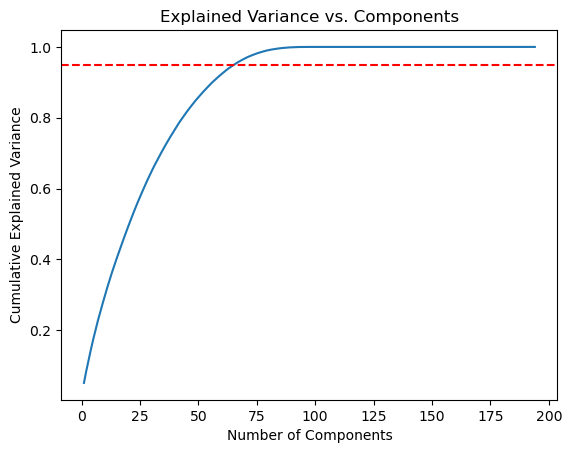

In [151]:
pca = PCA()
pca.fit(scaled_data)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Components')
plt.savefig('Explained_Variance_vs_Components.png', dpi=300, bbox_inches='tight')
plt.show()

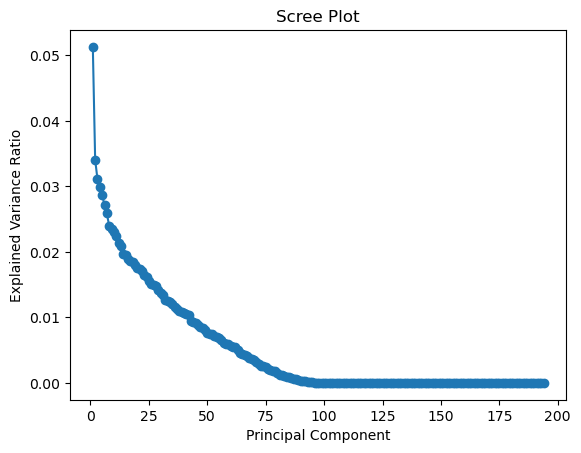

In [152]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.savefig('Scree_Plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [153]:
# Apply PCA
pca = PCA(n_components=70)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(scaled_data)

# Convert reduced data to a DataFrame
colm=[]
for i in range(1,71):
    colm.append(f'PC{i}') 
reduced_df = pd.DataFrame(reduced_data, columns= colm)

In [154]:
reduced_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.279603 -2.028639 -1.971131 -3.701256  1.196684  2.313295  1.729743   
1  0.074669 -2.041091 -1.977368 -3.005821  1.094513  1.390681  1.319460   
2  0.011004 -2.018425 -1.936550 -2.896264  1.071593  1.240087  1.264795   
3  0.311571 -2.132773 -2.062679 -3.508719  1.193119  2.110175  1.607016   
4  0.086488 -2.110455 -2.017101 -2.945049  1.135040  1.318794  1.285381   

        PC8       PC9      PC10  ...      PC61      PC62      PC63      PC64  \
0 -1.512352  0.318668 -0.313525  ... -0.129533 -0.005857  0.596258  0.019243   
1 -1.524411  0.290715 -0.922357  ... -0.098080 -0.008998 -0.744641 -0.468357   
2 -1.597963  0.297757 -1.014328  ... -0.087498 -0.063411 -0.656993 -0.090284   
3 -1.427458  0.262831 -0.513450  ... -0.107596  0.112764 -0.264076 -0.499745   
4 -1.546210  0.296386 -1.011942  ... -0.076617 -0.010618 -0.778186 -0.291903   

       PC65      PC66      PC67      PC68      PC69      PC70  
0 -0.522424  0.390206  1.098541 -1.121242  0.668329  1.331107  
1 -0.480801  0.010550  0.016739  0.548831  0.273953 -0.608910  
2 -0.521298  0.164875  0.382583  0.241451  0.769094  0.246107  
3 -0.433723  0.320671  0.038577  0.264021  0.022904 -0.751945  
4 -0.489014  0.271788  0.029698  0.614947  0.250882 -0.441150  

[5 rows x 70 columns]

In [155]:
non_numeric_columns = list(set(df.columns) - set(numeric_columns))
non_numeric_columns.remove('Website')
df[non_numeric_columns]

Elaborate    WineryName Code   Type         RegionName         Body  \
0    Varietal/100%  Casa Valduga   BR    Red  Vale dos Vinhedos  Full-bodied   
1    Varietal/100%  Casa Valduga   BR    Red  Vale dos Vinhedos  Full-bodied   
2    Varietal/100%  Casa Valduga   BR    Red  Vale dos Vinhedos  Full-bodied   
3    Varietal/100%  Casa Valduga   BR    Red  Vale dos Vinhedos  Full-bodied   
4    Varietal/100%  Casa Valduga   BR    Red  Vale dos Vinhedos  Full-bodied   
..             ...           ...  ...    ...                ...          ...   
995  Varietal/100%  Lake Chalice   NZ  White        Marlborough          nan   
996  Varietal/100%  Lake Chalice   NZ  White        Marlborough          nan   
997  Varietal/100%  Lake Chalice   NZ  White        Marlborough          nan   
998  Varietal/100%  Lake Chalice   NZ  White        Marlborough          nan   
999  Varietal/100%  Lake Chalice   NZ  White        Marlborough          nan   

                  WineName      Country Acidity Vintage  
0            Origem Merlot       Brazil  Medium    2010  
1            Origem Merlot       Brazil  Medium    2015  
2            Origem Merlot       Brazil  Medium    2016  
3            Origem Merlot       Brazil  Medium    2016  
4            Origem Merlot       Brazil  Medium    2016  
..                     ...          ...     ...     ...  
995  The Falcon Pinot Gris  New Zealand    High    2011  
996  The Falcon Pinot Gris  New Zealand    High    2012  
997  The Falcon Pinot Gris  New Zealand    High    2014  
998  The Falcon Pinot Gris  New Zealand    High    2014  
999  The Falcon Pinot Gris  New Zealand    High    2014  

[1000 rows x 10 columns]

# Modeling

In [157]:
modeling_df = pd.concat([df[non_numeric_columns].reset_index(drop=True), reduced_df.reset_index(drop=True)], axis=1)
#modeling_df.to_csv('Modeling_data.csv')
modeling_df.head()

Elaborate    WineryName Code Type         RegionName         Body  \
0  Varietal/100%  Casa Valduga   BR  Red  Vale dos Vinhedos  Full-bodied   
1  Varietal/100%  Casa Valduga   BR  Red  Vale dos Vinhedos  Full-bodied   
2  Varietal/100%  Casa Valduga   BR  Red  Vale dos Vinhedos  Full-bodied   
3  Varietal/100%  Casa Valduga   BR  Red  Vale dos Vinhedos  Full-bodied   
4  Varietal/100%  Casa Valduga   BR  Red  Vale dos Vinhedos  Full-bodied   

        WineName Country Acidity Vintage  ...      PC61      PC62      PC63  \
0  Origem Merlot  Brazil  Medium    2010  ... -0.129533 -0.005857  0.596258   
1  Origem Merlot  Brazil  Medium    2015  ... -0.098080 -0.008998 -0.744641   
2  Origem Merlot  Brazil  Medium    2016  ... -0.087498 -0.063411 -0.656993   
3  Origem Merlot  Brazil  Medium    2016  ... -0.107596  0.112764 -0.264076   
4  Origem Merlot  Brazil  Medium    2016  ... -0.076617 -0.010618 -0.778186   

       PC64      PC65      PC66      PC67      PC68      PC69      PC70  
0  0.019243 -0.522424  0.390206  1.098541 -1.121242  0.668329  1.331107  
1 -0.468357 -0.480801  0.010550  0.016739  0.548831  0.273953 -0.608910  
2 -0.090284 -0.521298  0.164875  0.382583  0.241451  0.769094  0.246107  
3 -0.499745 -0.433723  0.320671  0.038577  0.264021  0.022904 -0.751945  
4 -0.291903 -0.489014  0.271788  0.029698  0.614947  0.250882 -0.441150  

[5 rows x 80 columns]

In [158]:
# Apply Label Encoding to all categorical columns
categorical_cols = non_numeric_columns#.remove('WineName') 
categorical_cols.remove('WineName') 
# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    modeling_df[col] = le.fit_transform(modeling_df[col])
    label_encoders[col] = le

# Check the processed dataset
modeling_df.head()

Elaborate  WineryName  Code  Type  RegionName  Body       WineName  \
0          7          14     2     2          68     0  Origem Merlot   
1          7          14     2     2          68     0  Origem Merlot   
2          7          14     2     2          68     0  Origem Merlot   
3          7          14     2     2          68     0  Origem Merlot   
4          7          14     2     2          68     0  Origem Merlot   

   Country  Acidity  Vintage  ...      PC61      PC62      PC63      PC64  \
0        3        2       24  ... -0.129533 -0.005857  0.596258  0.019243   
1        3        2       29  ... -0.098080 -0.008998 -0.744641 -0.468357   
2        3        2       30  ... -0.087498 -0.063411 -0.656993 -0.090284   
3        3        2       30  ... -0.107596  0.112764 -0.264076 -0.499745   
4        3        2       30  ... -0.076617 -0.010618 -0.778186 -0.291903   

       PC65      PC66      PC67      PC68      PC69      PC70  
0 -0.522424  0.390206  1.098541 -1.121242  0.668329  1.331107  
1 -0.480801  0.010550  0.016739  0.548831  0.273953 -0.608910  
2 -0.521298  0.164875  0.382583  0.241451  0.769094  0.246107  
3 -0.433723  0.320671  0.038577  0.264021  0.022904 -0.751945  
4 -0.489014  0.271788  0.029698  0.614947  0.250882 -0.441150  

[5 rows x 80 columns]

In [160]:
# Select the most important features from the dataset using Recursive Feature Elimination
X = modeling_df.drop(['WineName','WineryName'], axis=1)  # Features
y = modeling_df['WineName']  

# Recursive Feature Elimination
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=20, step=5)
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
selected_features 

Index(['Code', 'RegionName', 'Country', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
       'PC8', 'PC9', 'PC12', 'PC25', 'PC30', 'PC31', 'PC37', 'PC39', 'PC41',
       'PC46', 'PC55', 'PC61'],
      dtype='object')

In [166]:
# Getting the final dataframe to put in model
final_df= modeling_df.groupby('WineName').agg({'Type': 'first', 'Elaborate': 'first', 'Body': 'first', 'Acidity': 'first', 'Code': 'first', 'Country': 'first',
       'RegionName': 'first', 'WineryName': 'first', 'PC1':'mean', 'PC2':'mean', 'PC3':'mean', 'PC4':'mean', 'PC4':'mean', 'PC5':'mean',
       'PC8':'mean', 'PC9':'mean', 'PC12':'mean', 'PC25':'mean', 'PC30':'mean', 'PC31':'mean', 'PC37':'mean', 'PC39':'mean', 'PC41':'mean', 'PC46':'mean','PC55':'mean',
       'PC61':'mean'}).reset_index()

In [167]:
#final_df.to_csv('Final_Model.csv')

In [168]:
X = final_df.drop(['WineName'], axis=1)  # Features
y = final_df['WineName'] 

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks tha

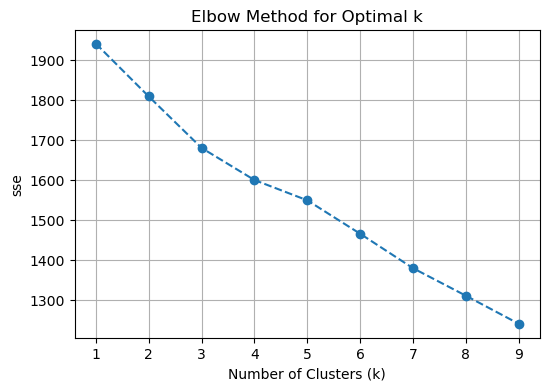

In [175]:
# Deciding on the number of clusters based on elbow method
os.environ["OMP_NUM_THREADS"] = "1"
scaler = StandardScaler()
X[selected_features] = scaler.fit_transform(X[selected_features])

# Elbow method: Calculate WCSS for different k values
sse = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[selected_features])
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(6, 4))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('sse')
plt.xticks(k_values)
plt.grid(True)
#plt.savefig('Elbow.png', dpi=300, bbox_inches='tight')
plt.show()

##### KNN

In [176]:
# Standardize numerical features
scaler = StandardScaler()
X[selected_features] = scaler.fit_transform(X[selected_features])

# Define metrics to test
metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski']

# Placeholder to store results
performance_scores = {}

# Simulate some basic evaluation: sum of all distances as a proxy (lower is better)
def evaluate_knn_performance(knn, X, metric):
    distances, indices = knn.kneighbors(X)
    total_distance = np.sum(distances)
    return total_distance

# Iterate through each metric
for metric in metrics:
    knn = NearestNeighbors(n_neighbors=4, metric=metric)
    knn.fit(X[selected_features])
    score = evaluate_knn_performance(knn, X[selected_features], metric)
    performance_scores[metric] = score

# Find the best-performing metric
best_metric = min(performance_scores, key=performance_scores.get)

# Print the results
print("Performance scores for each metric:")
for metric, score in performance_scores.items():
    print(f"Metric: {metric}, Total Distance: {score:.2f}")

print(f"\nBest metric: {best_metric}")


Performance scores for each metric:
Metric: euclidean, Total Distance: 1029.79
Metric: manhattan, Total Distance: 3043.95
Metric: cosine, Total Distance: 121.60
Metric: minkowski, Total Distance: 1029.79

Best metric: cosine


In [177]:
knn = NearestNeighbors(n_neighbors=4, metric='cosine')
knn.fit(X[selected_features])

NearestNeighbors(metric='cosine', n_neighbors=4)

In [178]:
# Step 5: Define recommendation function
def recommend_wines(wine_name, k=5):
    try:
        # Find index of the wine
        wine_index = final_df[final_df['WineName'] == wine_name].index[0]
        
        # Get neighbors
        distances, indices = knn.kneighbors([X.loc[wine_index][selected_features]], n_neighbors=k + 1)
        
        # Exclude the queried wine and return the recommendations
        recommended_indices = indices[0][1:]
        recommended_wines = final_df.iloc[recommended_indices]['WineName']
        print(recommended_indices)
        return recommended_wines.tolist()
    except IndexError:
        return f"Wine '{wine_name}' not found in the dataset."

recommendations = recommend_wines("Origem Merlot")
print(recommendations)

[38 83 61 67 18]
['Haven Pinot Noir', 'Santenay Rouge', 'Nuits-St-Georges Les Plateaux', "Pommard Premier Cru 'Grand Clos des Épenots'", 'Château Chemin Royal Moulis-en-Médoc']


C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



**KMeans**

In [185]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42) 
X['Cluster_Kmeans'] = kmeans.fit_predict(X[selected_features])

# Silhouette Score: Higher is better
def evaluate_kmeans_performance(kmeans, X, metric):
    labels = kmeans.labels_
    if len(np.unique(labels)) > 1:  
        silhouette_avg = silhouette_score(X, labels, metric=metric)
    else:
        silhouette_avg = -1 
    return silhouette_avg

evaluate_kmeans_performance(kmeans, X[selected_features], metric)

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.06473786407115387

In [195]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X[selected_features])

# Calculate metrics for K-Means
silhouette_kmeans = silhouette_score(X[selected_features], y_kmeans)
inertia_kmeans = kmeans.inertia_
db_index_kmeans = davies_bouldin_score(X[selected_features], y_kmeans)

# KNN-based Clustering
# Use KNN for unsupervised clustering by density estimation
#metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski']
knn = NearestNeighbors(n_neighbors=4, metric='minkowski').fit(X[selected_features])
distances, indices = knn.kneighbors(X[selected_features])

# Define pseudo-clusters using density threshold
threshold = np.percentile(distances.mean(axis=1), 80)  # 80th percentile for density
y_knn_clusters = (distances.mean(axis=1) < threshold).astype(int)  # 0 or 1 based on density

# Calculate metrics for KNN
if len(set(y_knn_clusters)) > 1:
    silhouette_knn = silhouette_score(X[selected_features], y_knn_clusters)
    db_index_knn = davies_bouldin_score(X[selected_features], y_knn_clusters)
else:
    silhouette_knn = np.nan  # Not enough clusters for silhouette
    db_index_knn = np.nan  # Not enough clusters for DB Index

#Output Results
print("Metrics for K-Means:")
print(f"Silhouette Score: {silhouette_kmeans:.3f}")
print(f"Inertia: {inertia_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_index_kmeans:.3f}")

print("\nMetrics for KNN-based Clustering:")
print(f"Silhouette Score: {silhouette_knn if not np.isnan(silhouette_knn) else 'N/A'}")
print(f"Davies-Bouldin Index: {db_index_knn if not np.isnan(db_index_knn) else 'N/A'}")


Metrics for K-Means:
Silhouette Score: 0.065
Inertia: 1599.726
Davies-Bouldin Index: 2.411

Metrics for KNN-based Clustering:
Silhouette Score: 0.27124793504529343
Davies-Bouldin Index: 6.108317570043695


C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [200]:
# Calculated the metrics using each clustering density esteemation and saved into table Validation.csv
validation=  pd.read_csv('Data/Validation.csv').set_index('Measure')
validation= validation.transpose()
#validation['Silhouette_score'].bar()

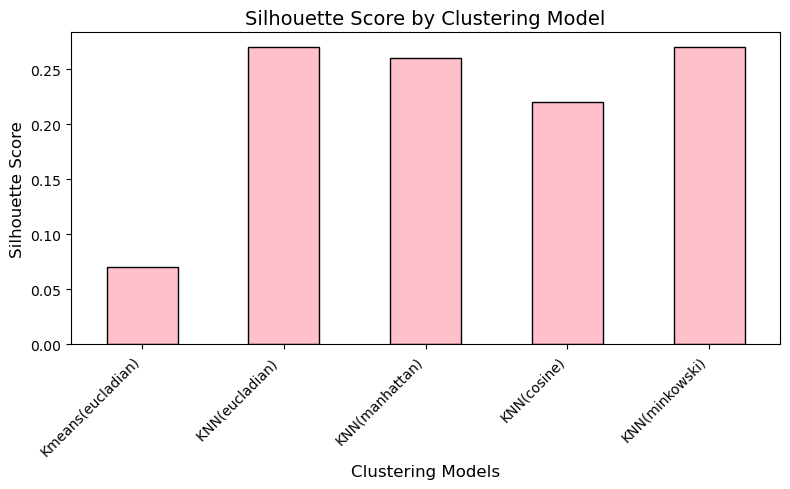

In [205]:
# Plotting Silhouette Score as a bar chart
validation['Silhouette_score'].plot.bar(
    color='pink', figsize=(8, 5), edgecolor='black'
)

# Adding labels and title
plt.title("Silhouette Score by Clustering Model", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xlabel("Clustering Models", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()

# Show the plot
plt.savefig('silhoutte_Score.png', dpi=300, bbox_inches='tight')
plt.show()

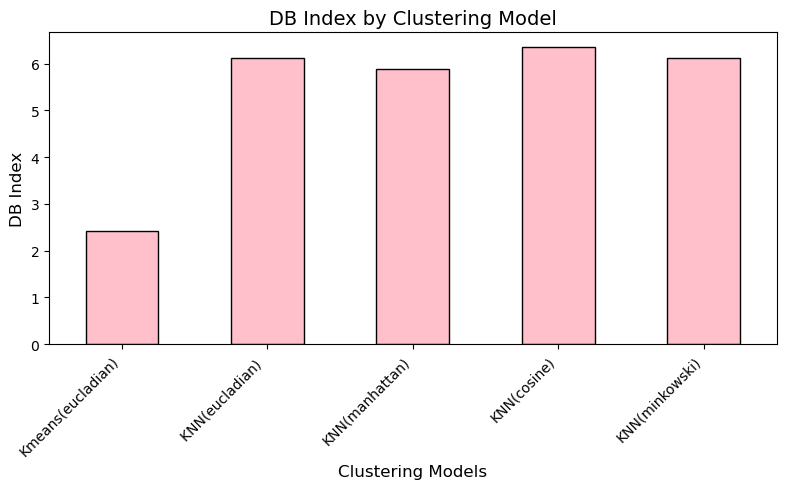

In [206]:
# Plotting Silhouette Score as a bar chart
validation['DB Index'].plot.bar(
    color='pink', figsize=(8, 5), edgecolor='black'
)

# Adding labels and title
plt.title("DB Index by Clustering Model", fontsize=14)
plt.ylabel("DB Index", fontsize=12)
plt.xlabel("Clustering Models", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()

# Show the plot
plt.savefig('DB Index.png', dpi=300, bbox_inches='tight')
plt.show()

In [208]:
# Train a K-Means model and save it into pkl
import joblib
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X[selected_features])

# Save the model as a .pkl file
joblib.dump(kmeans, 'kmeans_model.pkl')

print("K-Means model saved successfully!")

K-Means model saved successfully!


C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\roshn\anaconda3\envs\Sentimental_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [210]:
#X= X[selected_features]
#X['Winename']= y

In [211]:
#X.to_csv('kmeans_dataset.csv')

In [184]:


# Step 5: Define recommendation function
def recommend_wines_kmeans(wine_name, num_recommendations=5):
    try:
        # Find index of the wine
        wine_index = final_df[final_df['WineName'] == wine_name].index[0]
        
        # Get the cluster of the queried wine
        wine_cluster = X.loc[wine_index, 'Cluster_Kmeans']
        
        # Find other wines in the same cluster
        cluster_wines = final_df[X['Cluster_Kmeans'] == wine_cluster]
        
        # Exclude the queried wine from recommendations
        cluster_wines = cluster_wines[cluster_wines.index != wine_index]
        
        # Select top recommendations
        recommended_wines = cluster_wines['WineName'].head(num_recommendations)
        return recommended_wines.tolist()
    except IndexError:
        return f"Wine '{wine_name}' not found in the dataset."


recommendations_kmeans = recommend_wines_kmeans("Origem Merlot")
print(recommendations_kmeans)

['Black Label Nik Weis Saar Riesling', 'Cabernet Franc', 'Cabernet Sauvignon-Shiraz', 'Château Chemin Royal Moulis-en-Médoc', 'Cinsault-Grenache Rosé']


##### Other models tried

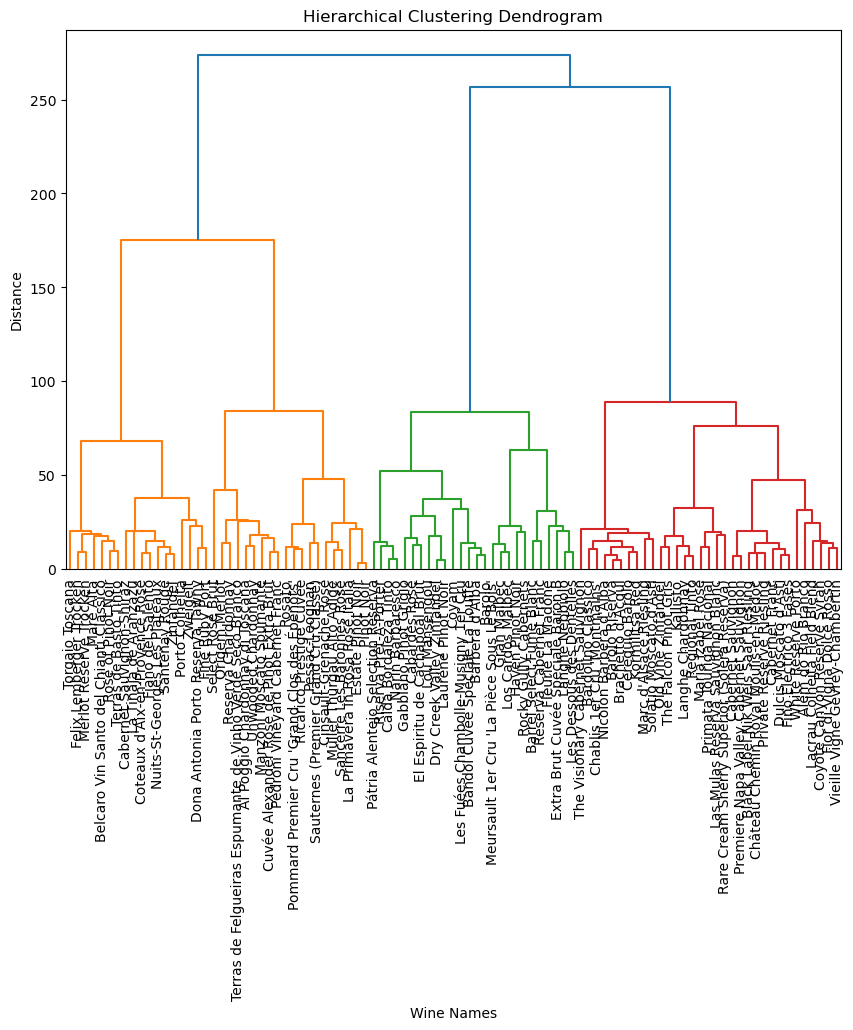

                          WineName  Cluster
0  Al Poggio Chardonnay di Toscana        2
1               Além do Rio Branco        5
2  Bandol Cuvée Spéciale La Louffe        3
3                   Barbera d'Alba        3
4               Bardolino Classico        4


In [256]:
# Hirearchical Clustering
linked = linkage(X[selected_features], method='ward')  # Ward linkage is common for clustering

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=final_df['WineName'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wine Names')
plt.ylabel('Distance')
plt.show()


num_clusters = 5  
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels back to the original dataset
final_df['Cluster'] = cluster_labels

# Display a sample of the dataset with clusters
print(final_df[['WineName', 'Cluster']].head())

In [258]:
selected_wine = 'Origem Merlot'  
selected_cluster = final_df.loc[final_df['WineName'] == selected_wine, 'Cluster'].values[0]

# Get all wines in the same cluster
recommendations = final_df[final_df['Cluster'] == selected_cluster]['WineName'].tolist()

# Remove the selected wine from the recommendations
recommendations = [wine for wine in recommendations if wine != selected_wine]

# Limit to the top 5 recommendations
top_recommendations = recommendations[:5]

print(f"Top 5 recommendations for {selected_wine}: {top_recommendations}")


Top 5 recommendations for Origem Merlot: ['Al Poggio Chardonnay di Toscana', 'Cinsault-Grenache Rosé', 'Cuvée Alexander Rose de Pinot Extra Brut', 'Estate Pinot Noir', 'La Primavera in Rosa Rosé Italia']


Number of clusters found (excluding noise): 0
Number of noise points: 97


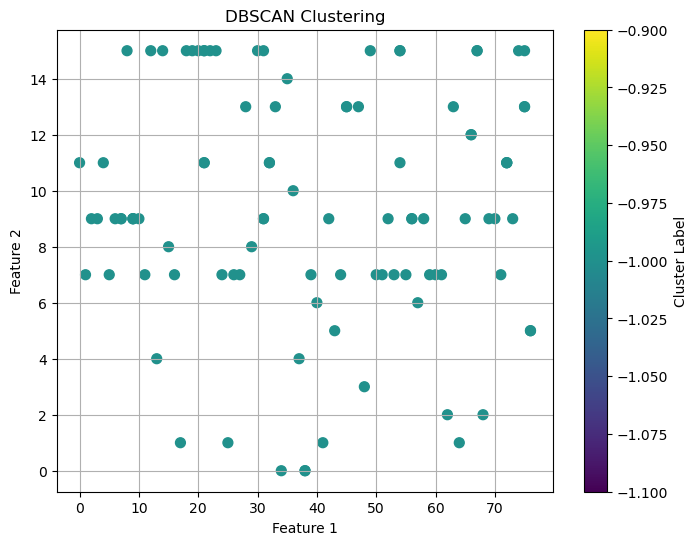

In [261]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  
cluster_labels = dbscan.fit_predict(X[selected_features])  

# Add cluster labels to the dataframe
final_df['Cluster'] = cluster_labels

# Analyze results
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_noise = list(cluster_labels).count(-1)
print(f"Number of clusters found (excluding noise): {num_clusters}")
print(f"Number of noise points: {num_noise}")

# Convert the features to a NumPy array for plotting
X_array = X[selected_features].to_numpy()

# Plot cluster distribution
plt.figure(figsize=(8, 6))
plt.scatter(X_array[:, 0], X_array[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [264]:
# Recommendations based on clusters
selected_wine = 'Origem Merlot'  # Replace with a wine name from your dataset
selected_cluster = final_df.loc[final_df['WineName'] == selected_wine, 'Cluster'].values[0]

if selected_cluster == -1:
    print(f"{selected_wine} is classified as noise and has no cluster-based recommendations.")
else:
    recommendations = final_df[final_df['Cluster'] == selected_cluster]['WineName'].tolist()
    recommendations = [wine for wine in recommendations if wine != selected_wine][:5]  # Top 5 recommendations
    print(f"Top 5 recommendations for {selected_wine}: {recommendations}")

Origem Merlot is classified as noise and has no cluster-based recommendations.


In [ ]:
# TLDR,  K parameter is the evaluation cutoff point , Precision at K, Recall at K , F Beta score is a metric that balances Precision and Recall, MRR calculates the average of the reciprocal ranks of the first relevant item.
# Hit Rate measures the share of users that get at least one relevant recommendation.
# https://www.evidentlyai.com/ranking-metrics/evaluating-recommender-systems

In [223]:
final_df.columns

Index(['WineName', 'Type', 'Elaborate', 'Body', 'Acidity', 'Code', 'Country',
       'RegionName', 'WineryName', 'PC1', 'PC2', 'PC3', 'PC4', 'PC8', 'PC9',
       'PC12', 'PC15', 'PC31', 'PC37', 'PC39', 'PC41', 'PC46', 'PC52', 'PC54',
       'PC61'],
      dtype='object')

In [274]:
# Metrics functions
def precision_at_k(actual, predicted, k):
    """Precision at K"""
    return len(set(predicted[:k]) & set(actual)) / k

def recall_at_k(actual, predicted, k):
    """Recall at K"""
    return len(set(predicted[:k]) & set(actual)) / len(actual)

def hit_rate(actual, predicted, k):
    """Hit Rate at K"""
    return 1 if len(set(predicted[:k]) & set(actual)) > 0 else 0

In [ ]:
# 2. KMeans Validation
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(features)

# Generate recommendations (simulated)
recommendations_kmeans = [random.sample(range(len(features)), 10) for _ in range(len(features))]

# Metrics for KMeans
precision_kmeans = np.mean([precision_at_k(actual_items[i], recommendations_kmeans[i], k) for i in range(len(X_test))])
recall_kmeans = np.mean([recall_at_k(actual_items[i], recommendations_kmeans[i], k) for i in range(len(X_test))])
hit_rate_kmeans = np.mean([hit_rate(actual_items[i], recommendations_kmeans[i], k) for i in range(len(X_test))])

In [273]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import precision_score, recall_score
import random

# Metrics functions
def precision_at_k(actual, predicted, k):
    """Precision at K"""
    return len(set(predicted[:k]) & set(actual)) / k

def recall_at_k(actual, predicted, k):
    """Recall at K"""
    return len(set(predicted[:k]) & set(actual)) / len(actual)

def hit_rate(actual, predicted, k):
    """Hit Rate at K"""
    return 1 if len(set(predicted[:k]) & set(actual)) > 0 else 0

# Load dataset
file_path = "final_dataframe.csv"
data = pd.read_csv(file_path)

# Assuming the dataset contains features and a target column (e.g., "Type" or similar)
if 'Type' in data.columns:
    target = data['Type']
    features = data.drop(['Type', 'Unnamed: 0'], axis=1)
else:
    # Use all columns as features if no explicit target is defined
    features = data.select_dtypes(include=[np.number]).drop(['Unnamed: 0'], axis=1)
    target = None  # No target available

# Split the dataset for KNN
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Randomly generate ground truth and recommendations for demonstration purposes
# Replace with actual ground truth and recommendations logic if available
actual_items = [random.sample(range(len(features)), 10) for _ in range(len(X_test))]  # Ground truth
k = 5  # Top K recommendations

# 1. KNN Validation
if target is not None:
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # Generate recommendations (simulated)
    recommendations_knn = [random.sample(range(len(features)), 10) for _ in range(len(X_test))]

    # Metrics for KNN
    precision_knn = np.mean([precision_at_k(actual_items[i], recommendations_knn[i], k) for i in range(len(X_test))])
    recall_knn = np.mean([recall_at_k(actual_items[i], recommendations_knn[i], k) for i in range(len(X_test))])
    hit_rate_knn = np.mean([hit_rate(actual_items[i], recommendations_knn[i], k) for i in range(len(X_test))])

# 2. KMeans Validation
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(features)

# Generate recommendations (simulated)
recommendations_kmeans = [random.sample(range(len(features)), 10) for _ in range(len(features))]

# Metrics for KMeans
precision_kmeans = np.mean([precision_at_k(actual_items[i], recommendations_kmeans[i], k) for i in range(len(X_test))])
recall_kmeans = np.mean([recall_at_k(actual_items[i], recommendations_kmeans[i], k) for i in range(len(X_test))])
hit_rate_kmeans = np.mean([hit_rate(actual_items[i], recommendations_kmeans[i], k) for i in range(len(X_test))])

# 3. DBSCAN Validation
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(features)

# Generate recommendations (simulated)
recommendations_dbscan = [random.sample(range(len(features)), 10) for _ in range(len(features))]

# Metrics for DBSCAN
precision_dbscan = np.mean([precision_at_k(actual_items[i], recommendations_dbscan[i], k) for i in range(len(X_test))])
recall_dbscan = np.mean([recall_at_k(actual_items[i], recommendations_dbscan[i], k) for i in range(len(X_test))])
hit_rate_dbscan = np.mean([hit_rate(actual_items[i], recommendations_dbscan[i], k) for i in range(len(X_test))])

# 4. Hierarchical Clustering Validation
hierarchical = AgglomerativeClustering(n_clusters=4)
clusters_hierarchical = hierarchical.fit_predict(features)

# Generate recommendations (simulated)
recommendations_hierarchical = [random.sample(range(len(features)), 10) for _ in range(len(features))]

# Metrics for Hierarchical Clustering
precision_hierarchical = np.mean([precision_at_k(actual_items[i], recommendations_hierarchical[i], k) for i in range(len(X_test))])
recall_hierarchical = np.mean([recall_at_k(actual_items[i], recommendations_hierarchical[i], k) for i in range(len(X_test))])
hit_rate_hierarchical = np.mean([hit_rate(actual_items[i], recommendations_hierarchical[i], k) for i in range(len(X_test))])

# Print results
print("KNN:")
print(f"Precision@K: {precision_knn}")
print(f"Recall@K: {recall_knn}")
print(f"Hit Rate: {hit_rate_knn}")

print("\nKMeans:")
print(f"Precision@K: {precision_kmeans}")
print(f"Recall@K: {recall_kmeans}")
print(f"Hit Rate: {hit_rate_kmeans}")

print("\nDBSCAN:")
print(f"Precision@K: {precision_dbscan}")
print(f"Recall@K: {recall_dbscan}")
print(f"Hit Rate: {hit_rate_dbscan}")

print("\nHierarchical Clustering:")
print(f"Precision@K: {precision_hierarchical}")
print(f"Recall@K: {recall_hierarchical}")
print(f"Hit Rate: {hit_rate_hierarchical}")


ValueError: could not convert string to float: 'Les Fuées Chambolle-Musigny 1er Cru'

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def display_wine(wine_details, selected_wine)
    if not wine_details[wine_details['WineName'] == selected_wine].empty:
            wine_info = wine_details[wine_details['WineName'] == selected_wine].iloc[0]
            # Use Streamlit columns for layout
            col1, col2 = st.columns([2, 4])  # Adjust column widths if necessary
            
            with col2:
                # Wine details in a single markdown
                st.markdown(f"""
                **Wine Name:** {wine_info['WineName']}  
                **Type of Wine:** {wine_info['Type']}  
                **Grapes Content:** {wine_info['Grapes']}  
                **Food Suggestion:** {wine_info['Harmonize']}  
                **Alcohol Content:** {wine_info['ABV']}%  
                **Country:** {wine_info['Country']}  
                **Acidity:** {wine_info['Acidity']}  
                **Website:** [Visit Website]({wine_info['Website']})
                """)
            
            with col1:
                # Check if the image file exists
                image_path = f"Data/XWines_Test_100_labels/{wine_info['WineID']}.jpeg"
                if os.path.exists(image_path):
                    # Display the image if it exists
                    st.image(
                        image_path, 
                        width=200, 
                        caption=wine_info['WineName']
                    )
                else:
                    # Display "No Image Available" message if the image is missing
                    st.markdown("**No Image Available**")
        else:
            st.write("Wine details not found.")